In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
# ideas:
# which strains HELP anxiety
# which strains HURT anxiety
# classify indica, sativa (logistic-regression)
# Feature Engineering: ----------------------------
# ratio--> total thc : total cbd
# 
# using strains known to be good for anxiety 
# -- what strains may be in the same family

In [3]:
# import cannabis data
df = pd.read_csv('Canna.csv')

In [4]:
# array of unimportant features to drop from the df
# ** TotalTHC == THC (repetitive data)
to_drop = ['ProjectURL',
           'H2O',
           'ReportType',
           'DateRecorded',
           'OCPID',
           'SampleID',
           'ChemicalLab',
           'TotalTHC',
           'Δ8-THC',
           'THCV',
           'CBDV',
           'Study',
           'StudyURL',
           'Run',
           'RunURL',
           'DatePublished',
           'Spots',
           'Bases',
           'Size',
           'Notes', 
           'SampleURL',
           'Organism',
           'OrganismURL',
           'Project',
           'GeneticLab',
           'Sample']

df.drop(to_drop, inplace=True, axis=1)

# storing strain values in as strains pandas series
# --separante non-numerical data from the df
strains = df['Strain']
df.drop('Strain', inplace=True, axis=1)

In [5]:
# use all chemical data available -- 256 samples
df = df[:255]
display(df)

,Strain,THC,Δ9-THC,THCA,TotalCBD,CBDA,CBDVA,CBC,CBG,CBN,...,Linalool,Isopulegol,Geraniol,β-Caryophyllene,α-Humelene,Nerolidol-1,Nerolidol-2,Guaiol,CaryophylleneOxide,α-Bisabolol
0,CHEM 4,193.00,0.00,203.0,0.00,0.00,NaN,NaN,NaN,NaN,...,0.37,0.0,0.0,5.48,2.03,0.0,0.00,0.00,0.0,0.87
1,Z7,0.00,0.00,0.0,140.00,147.00,NaN,NaN,NaN,NaN,...,0.25,0.0,0.0,2.35,1.14,0.0,0.00,0.25,0.0,0.62
2,ACDC/Harlequin,141.00,0.00,138.0,56.00,55.00,NaN,NaN,NaN,NaN,...,0.39,0.0,0.0,3.11,1.20,0.0,0.00,0.20,0.0,0.32
3,HarleyWreck,75.00,0.00,79.0,38.00,40.00,NaN,NaN,NaN,NaN,...,0.42,0.0,0.0,2.95,0.99,0.0,0.00,0.25,0.0,0.25
4,Sour Amnesia,222.00,0.00,222.0,0.00,0.00,NaN,NaN,NaN,NaN,...,0.28,0.0,0.0,1.42,0.58,0.0,0.00,0.00,0.0,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Og Banana Berry,159.82,10.30,155.0,1.27,0.00,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,1.36,0.00,0.0,0.00,0.00,0.0,0.00
251,Holy Widow,163.76,8.62,158.0,3.55,2.44,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00
252,Blue Berry Blast,222.81,8.12,220.0,0.00,0.00,0.0,0.0,0.00,0.0,...,0.78,0.0,0.0,3.08,0.91,0.0,0.00,0.00,0.0,0.00
253,Harletsu X Black Dog,44.18,0.00,45.0,136.00,137.00,16.7,0.0,0.00,0.0,...,0.63,0.0,0.0,1.57,0.00,0.0,0.00,0.00,0.0,0.00


In [6]:
# cols = feature names (columns) of df
cols = df.columns
# for col in cols:
#     print(col)

Strain
THC
Δ9-THC
THCA
TotalCBD
CBDA
CBDVA
CBC
CBG
CBN
α-Pinene
Camphene
Myrcene
β-Pinene
3-Carene
α-Terpinene
D-Limonene
p-Cymene
Ocimene
Eucalyptol
γ-Terpinene
Terpinolene
Linalool
Isopulegol
Geraniol
β-Caryophyllene
α-Humelene
Nerolidol-1
Nerolidol-2
Guaiol
CaryophylleneOxide
α-Bisabolol


In [33]:
# Replacing NaN values with 0 -- (initial method) is there a better way
df.fillna(0, inplace=True)

In [34]:
# making sure df is all non-null
# df.info()

In [ ]:
####################################################################

In [ ]:
# Unsupervised Learning Techniques

In [39]:
# P.C.A. 
# 1. Standardize --> Z=(x-mu)/s
scaler = StandardScaler()
X_train = df.to_numpy()
scaled = pd.DataFrame(scaler.fit_transform(X_train))

# display(df)
# display(scaled)

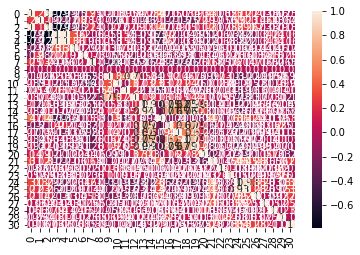

In [46]:
# 2. Covariance Matrix -- how all features relate
covariance = scaled.cov()
varCorr = scaled.corr()
#sns.heatmap(varCorr, xticklabels=varCorr.columns, yticklabels=varCorr.columns, annot=True)
sns.heatmap(covariance, xticklabels=covariance.columns, yticklabels=covariance.columns, annot=True)
# display(varCorr)

In [ ]:
# K-means clustering model for unsupervised similarity discovery
# for our first try k=2 (good for anx | not good for anx)
k = 2

In [ ]:
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}

In [ ]:
fig = plt.figure(figsize=(10, 10))

plt.scatter(df['TotalTHC'], df['TotalCBD'], color='k')
colmap = {1: 'r', 2: 'g'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
# plt.xlim(0, 80)
# plt.ylim(0, 80)
plt.show()

In [ ]:
df.describe()